# Introduction
The goal of this analysis is to get familiar with dataset columns and find:
- preprocessing: fill NaNs, outlier detection, numerization
- name feature extraction

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

from utils import extract_number, TitleParserTV

## Variables

In [2]:
data_path = Path("../data/Televisions.csv")

# Data Loading

In [3]:
df = pd.read_csv(data_path)
df.shape

(1104, 9)

In [4]:
df.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Samsung 80 cm (32 Inches) Wondertainment Serie...,"tv, audio & cameras",Televisions,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Samsung-Inches-Wondertai...,4.2,"8,877","₹12,990","₹22,900"
1,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,"tv, audio & cameras",Televisions,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/MI-inches-Ready-Android-...,4.2,"34,286","₹13,999","₹24,999"
2,Redmi 80 cm (32 inches) Android 11 Series HD R...,"tv, audio & cameras",Televisions,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Redmi-inches-Ready-L32M6...,4.2,"47,642","₹13,999","₹24,999"
3,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,"tv, audio & cameras",Televisions,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/OnePlus-55-inches-Androi...,4.2,"8,290","₹38,999","₹49,999"
4,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,"tv, audio & cameras",Televisions,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/OnePlus-inches-Ready-And...,4.2,"36,800","₹14,999","₹19,999"


In [5]:
df = df.drop(["main_category", "sub_category"], axis=1)
df.head()

,name,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Samsung 80 cm (32 Inches) Wondertainment Serie...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Samsung-Inches-Wondertai...,4.2,"8,877","₹12,990","₹22,900"
1,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/MI-inches-Ready-Android-...,4.2,"34,286","₹13,999","₹24,999"
2,Redmi 80 cm (32 inches) Android 11 Series HD R...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Redmi-inches-Ready-L32M6...,4.2,"47,642","₹13,999","₹24,999"
3,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/OnePlus-55-inches-Androi...,4.2,"8,290","₹38,999","₹49,999"
4,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/OnePlus-inches-Ready-And...,4.2,"36,800","₹14,999","₹19,999"


# Extract Information From Names

For extracting information from names, there are the following information options available:

- Brand Name
- Size
- Resolution
- Type (e.g., LED, Smart)
- Color




In [6]:
# See some names to design strategy to extract information from
df.name.sample(20).values

array(['MICROSMT M36 Smart LED TV (50-SMT-SB/1024/08-KSR-22),50 Inches.',
       'Dot One FrameLess 43 Inches (109 cm) (Resolution - 1080p Full HD) Android Smart LED TV 43F.1-FLC9 (Black)',
       'Samsung 80 cm (32 Inches) HD Ready Smart LED TV UA32T4900 (Black) (2021 Model)',
       '18V LXT SUB-Compact 2PCCOMBO KIT',
       'MICROSMT M44 Smart LED TV (24-HD-KSR-22),24 Inches.',
       'OnePlus 138.8 cm (55 inches) Q1 Series 4K Certified Android QLED TV 55Q1IN-1 (Black) (Without Stand)',
       'Hisense 80 cm (32 inches) Android 11 Series HD Ready Smart Certified Android LED TV 32E4G (Black)',
       'TCL 164 cm (65 inches) 4K Ultra HD Certified Android Smart LED TV 65P615 (Black)',
       'MICROSMT Smart LED TV (24-HD-KSR-22),24 Inches.',
       'MICROSMT M82 Smart LED TV (65-SMT-SL/1024/08-KSR-22),65 Inches.',
       'iFFALCON 80 cm (32 inches) HD Ready LED TV\xa032E32 (Black)',
       'Daktron 85 Inch 4K Ultra HD Smart LED TV',
       'Crownton 80 cm (32 Inches) Aqua Series Full H

To find color and brands name entity recognition plus some additional rules may be apply better, but for this toy project, I prefer to use regex and list of brand names to extract information from. 

In [7]:
name = df.name.iloc[0]
print(name)
parser = TitleParserTV()
parser.parse_all(name)

Samsung 80 cm (32 Inches) Wondertainment Series HD Ready LED Smart TV UA32T4340BKXXL (Glossy Black)


{'non_english': False,
 'is_tv': True,
 'brand': 'SAMSUNG',
 'size_inch': '32 Inches',
 'size_cm': '80 cm',
 'resolution': 'HD',
 'type': 'Smart TV',
 'color': 'BLACK'}

In [8]:
df["non_english"], df["is_tv"], df["brand"], df["size_inch"], df["size_cm"], df["resolution"], df["type"], df["color"] = zip(*df["name"].map(lambda x: list(parser.parse_all(x).values())))

In [9]:
df.head()

,name,image,link,ratings,no_of_ratings,discount_price,actual_price,non_english,is_tv,brand,size_inch,size_cm,resolution,type,color
0,Samsung 80 cm (32 Inches) Wondertainment Serie...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Samsung-Inches-Wondertai...,4.2,"8,877","₹12,990","₹22,900",False,True,SAMSUNG,32 Inches,80 cm,HD,Smart TV,BLACK
1,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/MI-inches-Ready-Android-...,4.2,"34,286","₹13,999","₹24,999",False,True,MI,32 inches,80 cm,HD,Smart TV,BLACK
2,Redmi 80 cm (32 inches) Android 11 Series HD R...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Redmi-inches-Ready-L32M6...,4.2,"47,642","₹13,999","₹24,999",False,True,REDMI,32 inches,80 cm,HD,Smart TV,BLACK
3,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/OnePlus-55-inches-Androi...,4.2,"8,290","₹38,999","₹49,999",False,True,ONEPLUS,55 inches,138 cm,4K,Smart TV,BLACK
4,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/OnePlus-inches-Ready-And...,4.2,"36,800","₹14,999","₹19,999",False,True,ONEPLUS,32 inches,80 cm,HD,Smart TV,BLACK


In [10]:
df["size_inch"] = df["size_inch"].apply(extract_number)
df["size_cm"] = df["size_cm"].apply(extract_number)
df["size"] = df["size_inch"]
df["size"] = df["size"].fillna(df["size_cm"].astype("Int64") / 2.54)
df["size"].count()

np.int64(1014)

In [11]:
df = df[df["non_english"]==False]
df = df[df["is_tv"]]

In [12]:
df["is_tv"].value_counts()

is_tv
True    1003
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 0 to 1102
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1003 non-null   object 
 1   image           1003 non-null   object 
 2   link            1003 non-null   object 
 3   ratings         566 non-null    object 
 4   no_of_ratings   566 non-null    object 
 5   discount_price  623 non-null    object 
 6   actual_price    645 non-null    object 
 7   non_english     1003 non-null   bool   
 8   is_tv           1003 non-null   bool   
 9   brand           1003 non-null   object 
 10  size_inch       961 non-null    float64
 11  size_cm         712 non-null    float64
 12  resolution      791 non-null    object 
 13  type            996 non-null    object 
 14  color           635 non-null    object 
 15  size            969 non-null    Float64
dtypes: Float64(1), bool(2), float64(2), object(11)
memory usage: 120.5+ KB


In [14]:
brand_count = df["brand"].value_counts()

brand_mapper = {name : "Generic" for name in brand_count[brand_count < 5].index.to_list()}
df["brand"] = df["brand"].apply(lambda x : brand_mapper[x] if x in brand_mapper else x)

In [15]:
df["brand"].value_counts()

brand
Generic         309
MI              133
SAMSUNG          84
LG               65
SONY             37
INVANTER         21
IMEE             20
TCL              20
KODAK            19
POWER            19
HISENSE          16
VU               15
NEXTVIEW         15
ACER             13
WESTINGHOUSE     11
AKAI             11
SANSUI           11
ONEPLUS          11
HYUNDAI          10
SKYWALL          10
VW               10
COOCAA           10
NEBILLIO         10
JJ               10
INTEX             9
ONIDA             8
FOXSKY            8
TOSHIBA           8
TRUSENSE          7
HUIDI             7
IFFALCON          6
REDMI             6
KEVIN             6
PHILIPS           6
CROWNTON          6
CORNEA            6
CANDES            5
BPL               5
BESTON            5
COMPAQ            5
TELESTONE         5
IAIR              5
Name: count, dtype: int64

# Cleaning Data

In [17]:

df["actual_price"] = df["actual_price"].dropna().apply(lambda x: int(str(x)[1:].replace(",", "")) if not pd.isnull(x) else x)
df["discount_price"] = df["discount_price"].dropna().apply(lambda x: int(str(x)[1:].replace(",", "")) if not pd.isnull(x) else x)

df["no_of_ratings"] = pd.to_numeric(df["no_of_ratings"].str.replace(",",""), errors='coerce').astype("Int64")
df["ratings"] = pd.to_numeric(df["ratings"], errors='coerce')
df["resolution"] = df["resolution"].str.upper()

In [18]:
df.head()

,name,image,link,ratings,no_of_ratings,discount_price,actual_price,non_english,is_tv,brand,size_inch,size_cm,resolution,type,color,size
0,Samsung 80 cm (32 Inches) Wondertainment Serie...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Samsung-Inches-Wondertai...,4.2,8877,12990.0,22900.0,False,True,SAMSUNG,32.0,80.0,HD,Smart TV,BLACK,32.0
1,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/MI-inches-Ready-Android-...,4.2,34286,13999.0,24999.0,False,True,MI,32.0,80.0,HD,Smart TV,BLACK,32.0
2,Redmi 80 cm (32 inches) Android 11 Series HD R...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Redmi-inches-Ready-L32M6...,4.2,47642,13999.0,24999.0,False,True,REDMI,32.0,80.0,HD,Smart TV,BLACK,32.0
3,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/OnePlus-55-inches-Androi...,4.2,8290,38999.0,49999.0,False,True,ONEPLUS,55.0,138.0,4K,Smart TV,BLACK,55.0
4,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/OnePlus-inches-Ready-And...,4.2,36800,14999.0,19999.0,False,True,ONEPLUS,32.0,80.0,HD,Smart TV,BLACK,32.0


In [19]:
cleaned_df = df[["name","ratings", "no_of_ratings", "discount_price", "actual_price", "brand", "size", "color", "resolution", "type"]]
cleaned_df.head()

,name,ratings,no_of_ratings,discount_price,actual_price,brand,size,color,resolution,type
0,Samsung 80 cm (32 Inches) Wondertainment Serie...,4.2,8877,12990.0,22900.0,SAMSUNG,32.0,BLACK,HD,Smart TV
1,MI 80 cm (32 inches) 5A Series HD Ready Smart ...,4.2,34286,13999.0,24999.0,MI,32.0,BLACK,HD,Smart TV
2,Redmi 80 cm (32 inches) Android 11 Series HD R...,4.2,47642,13999.0,24999.0,REDMI,32.0,BLACK,HD,Smart TV
3,OnePlus 138 cm (55 inches) Y Series 4K Ultra H...,4.2,8290,38999.0,49999.0,ONEPLUS,55.0,BLACK,4K,Smart TV
4,OnePlus 80 cm (32 inches) Y Series HD Ready LE...,4.2,36800,14999.0,19999.0,ONEPLUS,32.0,BLACK,HD,Smart TV


In [21]:
cleaned_df.to_csv("../data//cleaned_tv_data.csv")

# WordClouds

['Generic', 'MI', 'SAMSUNG', 'LG', 'SONY']
Generic


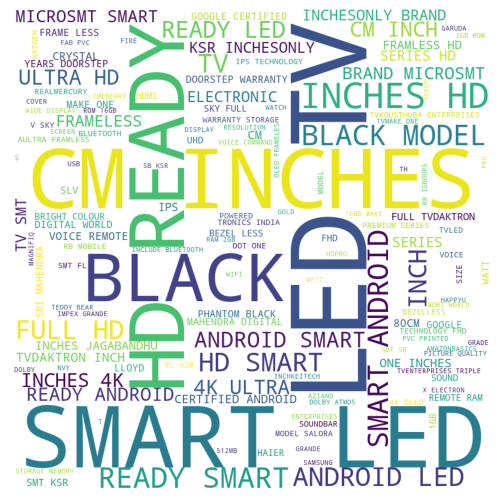

MI


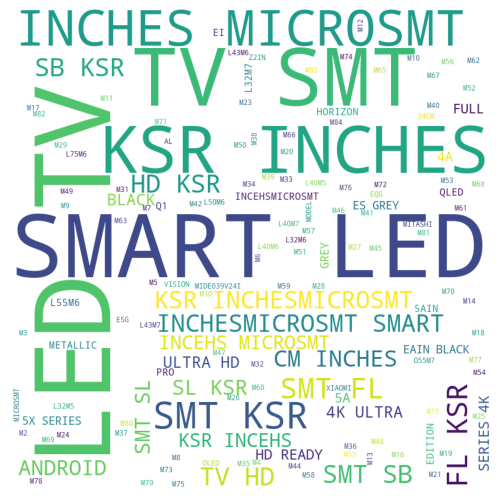

SAMSUNG


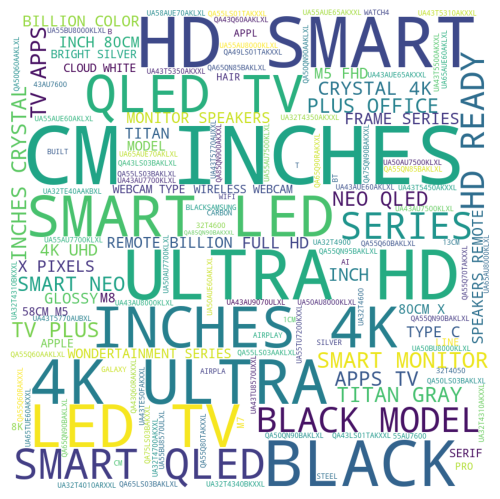

LG


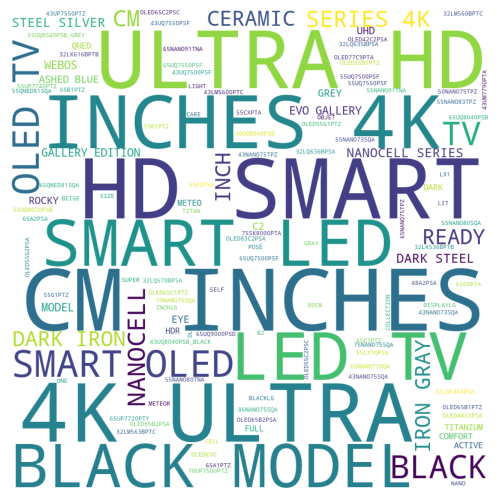

SONY


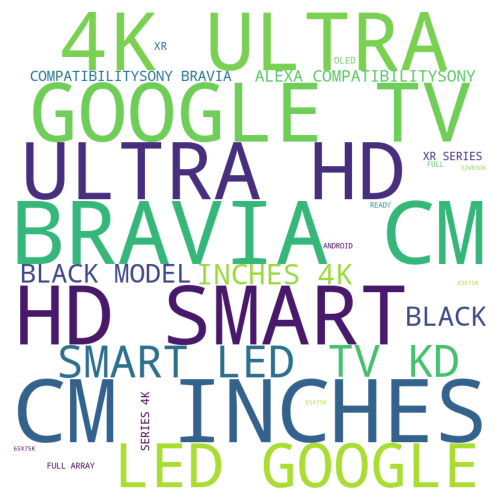

In [22]:


top_5_brands = df["brand"].value_counts().sort_values(ascending=False).index.to_list()[:5]
print(top_5_brands)

stopwords = set(STOPWORDS)

group =  df.groupby("brand")["name"].sum()
for brand in top_5_brands:
    print(brand)
    plt.figure()
    # print(group[brand])
    text = group[brand].upper()
    stopwords.add(brand)
    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(text)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()
    plt.close()